In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%run Data.ipynb

## Graphs

In [50]:
Graph_folder = '․․/Results/Graphs/'

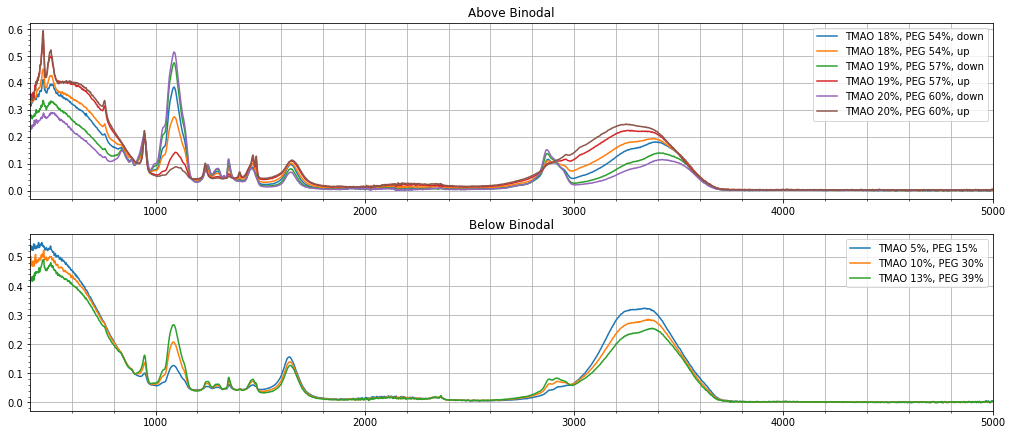

In [54]:
fig, axs = plt.subplots(2, 1)

fig.set_figheight(4.76*1.5)
fig.set_figwidth(11.5*1.5)


axs[0].set_title("Above Binodal")
axs[0].minorticks_on()
axs[0].xaxis.grid(True, which='both')
axs[0].yaxis.grid(True, which='major')
axs[0].set_xlim([400, 5000])
axs[0].plot(Lambda, Above[2], label="TMAO 18%, PEG 54%, down")
axs[0].plot(Lambda, Above[3], label="TMAO 18%, PEG 54%, up")
axs[0].plot(Lambda, Above[1], label="TMAO 19%, PEG 57%, down")
axs[0].plot(Lambda, Above[4], label="TMAO 19%, PEG 57%, up")
axs[0].plot(Lambda, Above[0], label="TMAO 20%, PEG 60%, down")
axs[0].plot(Lambda, Above[5], label="TMAO 20%, PEG 60%, up")
axs[0].legend()


axs[1].set_title("Below Binodal")
axs[1].minorticks_on()
axs[1].xaxis.grid(True, which='both')
axs[1].yaxis.grid(True, which='major')
axs[1].set_xlim([400, 5000])
axs[1].plot(Lambda, Below[0], label="TMAO 5%, PEG 15%")
axs[1].plot(Lambda, Below[1], label="TMAO 10%, PEG 30%")
axs[1].plot(Lambda, Below[2], label="TMAO 13%, PEG 39%")
axs[1].legend()

plt.savefig('Two-Component Solutions')

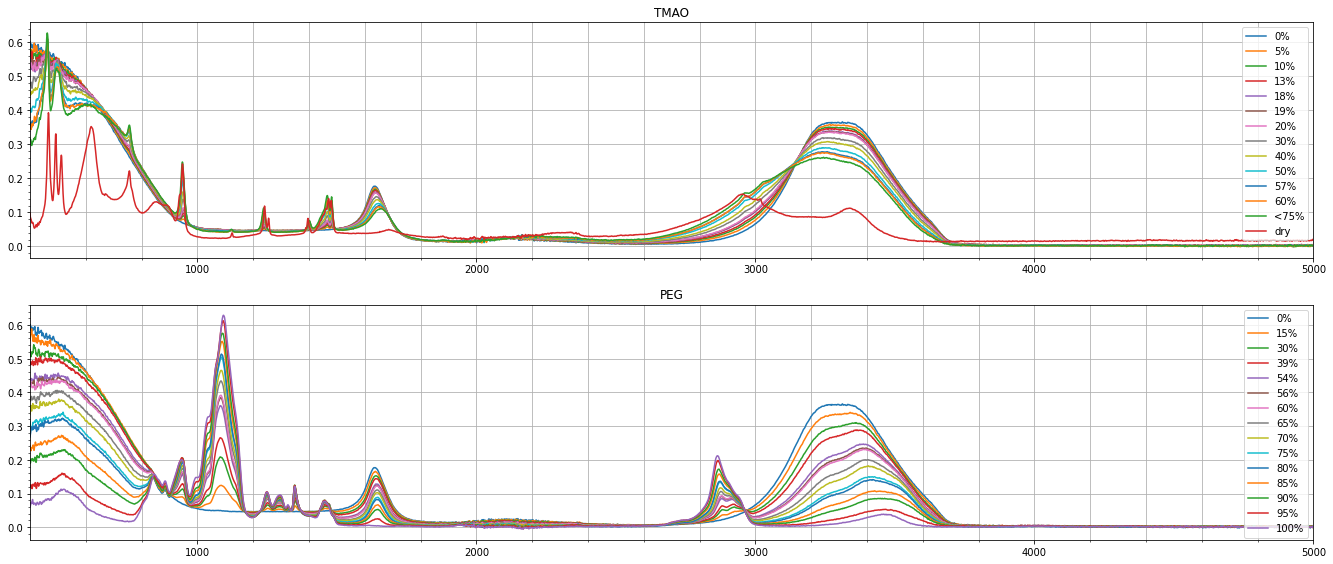

In [52]:
fig, axs = plt.subplots(2, 1)

fig.set_figheight(4.76*2)
fig.set_figwidth(11.5*2)

axs[0].set_title("TMAO")
axs[0].minorticks_on()
axs[0].xaxis.grid(True, which='both')
axs[0].yaxis.grid(True, which='major')
axs[0].set_xlim([400, 5000])

for s in range(TMAO.shape[0]):
    axs[0].plot(Lambda, TMAO[s], label=str(int(n_TMAO[s]*100))+"%")
axs[0].plot(Lambda, TMAO_high, label="<75%")
axs[0].plot(Lambda, TMAO_Dry, label="dry")
axs[0].legend()


axs[1].set_title("PEG")
axs[1].minorticks_on()
axs[1].xaxis.grid(True, which='both')
axs[1].yaxis.grid(True, which='major')
axs[1].set_xlim([400, 5000])

for s in range(PEG.shape[0]):
    axs[1].plot(Lambda, PEG[s], label=str(int(n_PEG[s]*100))+"%")

axs[1].legend()

plt.savefig('One-Component Solutions')

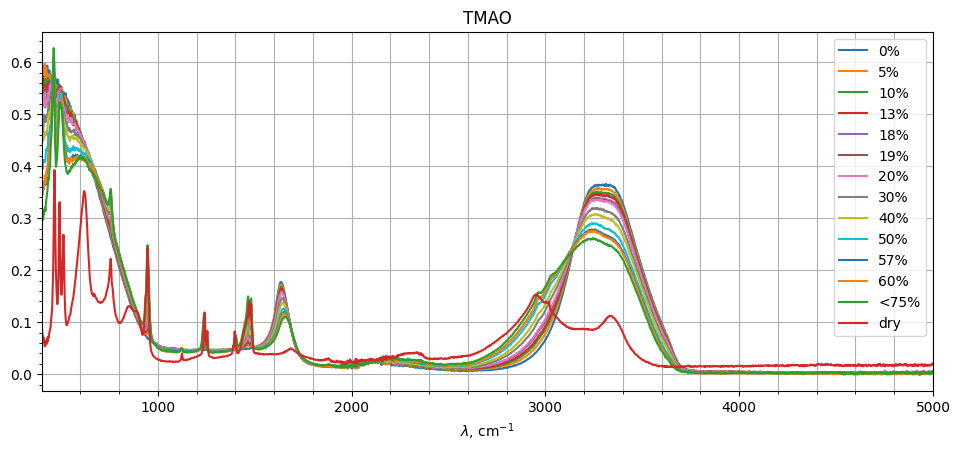

In [60]:
plt_spectrum_header()
plt.title('TMAO')

for s in range(TMAO.shape[0]):
    plt.plot(Lambda, TMAO[s], label=str(int(n_TMAO[s]*100))+"%")
plt.plot(Lambda, TMAO_high, label="<75%")
plt.plot(Lambda, TMAO_Dry, label="dry")
plt.legend()

plt.savefig('TMAO titration')

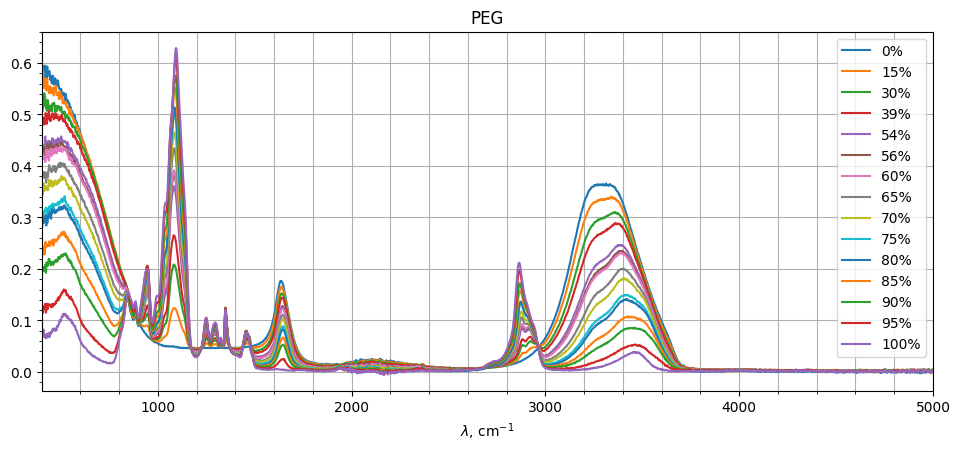

In [61]:
plt_spectrum_header()
plt.title('PEG')

for s in range(PEG.shape[0]):
    plt.plot(Lambda, PEG[s], label=str(int(n_PEG[s]*100))+"%")

plt.legend()

plt.savefig('PEG titration')

# Two-component Solutions

Let's take a look at a couple of graphs of absobence against concentration at fixed wavelengths. Most of them are linear but there are exeptions. Here the most interesting ones are shown.

In [3]:
def plot_fixed_lambda(L, TMAO_PEG):
    k, b = np.polyfit(range(Lambda.shape[0]), Lambda, 1)
    i = int((L-b)/k)
    
    plt.grid()
    plt.ylabel('Absobance')
    if (TMAO_PEG == 0):
        plt.xlabel('TMAO concentration')
        plt.plot(n_TMAO, TMAO[:,i], 'ok')
    elif (TMAO_PEG == 1):
        plt.xlabel('PEG concentration')
        plt.plot(n_PEG, PEG[:,i], 'ok')
    else:
        print('TMAO_PEG must be either 0 or 1')

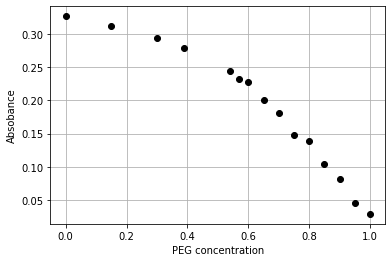

In [12]:
plot_fixed_lambda(3400, 1)

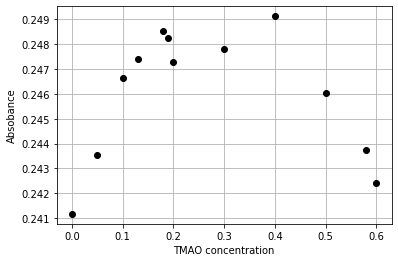

In [12]:
plot_fixed_lambda(3143, 0)

We can legimially assume that there are complexes involving both solvent and solute.

$f = c_0 f_0 + c_1 f_1 + c_{01} f_{01}$

$c_{01} = k {c_0^{\alpha_0} c_1^{\alpha_1}}$

$n_0 = c_0 + \alpha_0 c_{01}$

$n_1 = c_1 + \alpha_1 c_{01}$

Here $f$ is the absorbence fo the solution, $c_0$, $c_1$ and $c_{01}$ are the concentrations of the components (solvent, solute and complex), $f_0$ and $f_1$ are there absorbence and $f_{01}$ is the absorbence of the complex.

In [ ]:
fsolve(f, x0, args=(), fprime)
curve_fit(model, x, y, bounds, jac)

In [15]:
def f(c01, n, k, a0, a1):
    f = k * (1 - n - a0*c01)**a0 * (n - a1*c01)**a1
    return f - c01

def fprime(c01, n, k, a0, a1):
    fprime = - k * a0**2 * (1 - n - a0*c01)**(a0-1) * (n - a1*c01) ** a1
    fprime -= k * (1 - n - a0*c01)**a0 * a1**2 * (n - a1*c01)**(a1-1)
    return fprime - 1

def concentration(n, k, a0, a1):
    c01 = fsolve(f, 0, (n, k, a0, a1), fprime) # check if it works
    c0 = 1 - n - a0*c01
    c1 = n - a1*c1
    return c0, c1, c01

def PEG_model(x):
    n, k, a0, a1, f01= x[0], x[1], x[2], x[3], x[4]
    c0, c1, c01 = concentration(n, k, a0, a1)
    return c0*f0 + c1*f1 + c01*f01

## TMAO

From the plot of TMAO we see, that the spectra of solutions do not converge to the spectum of dry TMAO, but they converge to the spectrum of water. Thus we have two coefficents to find: $f_1$ and $f_{01}$.

$c_1 f_1 + 4 c_1 (1 - c_1) f_{01} = f_{sol} - (1 - c_1) f_0$

We will find them with the method of linear regression with least squere errors.

In [8]:
Inter_TMAO = []
d_Inter_TMAO = []
TMAO_Pure = []
d_TMAO_Pure = []
Cov_TMAO = []

for L in range(np.shape(Lambda)[0]):
    x = n_TMAO
    y = TMAO[:, L]
    y = y - y[0]*(1-x)
    x = np.array([4*x*(1-x), x]).T
    
    rcond = len(x)*np.finfo(x.dtype).eps

    # scale x to improve condition number and solve
    scale = ((x*x).sum(axis=0))**.5
    x /= scale
    c, resids, rank, s = np.linalg.lstsq(x, y, rcond)
    c = (c.T/scale).T  # broadcast scale coefficients

    Vbase = np.linalg.inv(np.dot(x.T, x))
    Vbase /= np.outer(scale, scale)
    
    fac = resids / (len(x) - 1)
    
    Inter_TMAO.append(c[0])
    d_Inter_TMAO.append(Vbase[0, 0] * fac)
    TMAO_Pure.append(c[1])
    d_TMAO_Pure.append(Vbase[1, 1] * fac)
    Cov_TMAO.append(Vbase * fac)

Inter_TMAO = np.array(Inter_TMAO).squeeze()
d_Inter_TMAO = np.array(d_Inter_TMAO).squeeze() ** .5
TMAO_Pure = np.array(TMAO_Pure).squeeze()
d_TMAO_Pure = np.array(d_TMAO_Pure).squeeze() ** .5
Cov_TMAO = np.array(Cov_TMAO).squeeze()

In [58]:
def plt_spectrum_header():
    plt.figure(dpi=100, figsize=(11.5,4.76))
    plt.minorticks_on()
    plt.grid(True, which='both', axis='x')
    plt.grid(True, which='major', axis='y')
    plt.xlim([400, 5000])
    #plt.ylim([-.01, .5])
    plt.xlabel('$\lambda$, cm$^{-1}$')

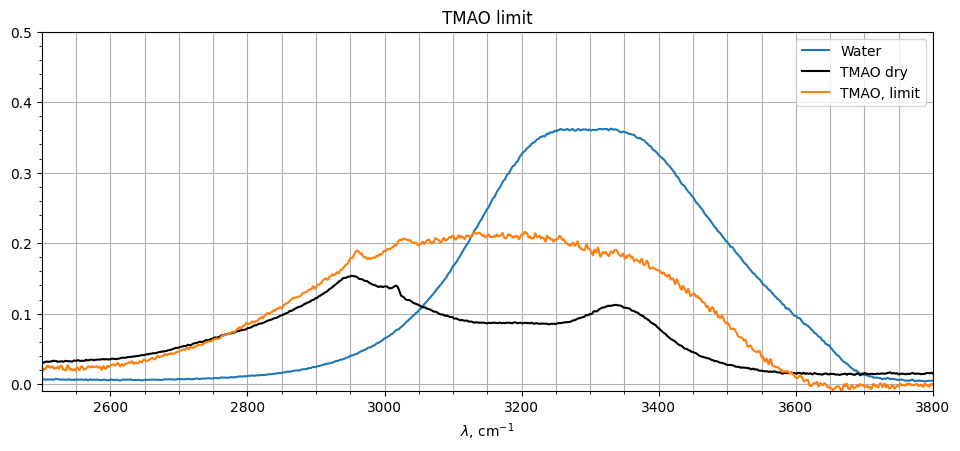

In [38]:
plt_spectrum_header()
plt.title('TMAO limit')

plt.plot(Lambda, UP, 'tab:blue', label='Water')
plt.plot(Lambda, TMAO_Dry, 'k', label='TMAO dry')

plt.plot(Lambda, TMAO_Pure, 'tab:orange', label = 'TMAO, limit')
#plt.plot(Lambda, TMAO_Pure + d_TMAO_Pure, 'tab:orange')
#plt.plot(Lambda, TMAO_Pure - d_TMAO_Pure, 'tab:orange')

#plt.plot(Lambda, Inter_TMAO, 'tab:red', label='Interaction')
#plt.plot(Lambda, Inter_TMAO + d_Inter_TMAO, 'tab:red')
#plt.plot(Lambda, Inter_TMAO - d_Inter_TMAO, 'tab:red')

plt.legend()
plt.savefig('Pure TMAO in water')

Here we see, that the spectrum of dry TMAO and "wet TMAO" are drasticly different. The reason for it is most likely the distruction of the crystal latis of TMAO during dissociation in water.

We can also sea, that the quadratic contribution is fairly small here.

## PEG

In case of PEG the spectra converge both to the spectrum of pure PEG and water. The graphs sugest linear approximation i both ends.

In [147]:
def left_regression_PEG(i):
    PEG_in_Water = []
    d_PEG_in_Water = []
    r = []
    
    for L in range(len(Lambda)):
        x = n_PEG[:i, np.newaxis].copy()
        y = PEG[:i, L].copy()
        y = y - y[0]
        Var_y = (y**2).mean() - y.mean()**2
        
        rcond = len(x)*np.finfo(x.dtype).eps
        
        # scale x to improve condition number and solve
        scale = ((x*x).sum(axis=0))**.5
        x /= scale
        c, resids, rank, s = np.linalg.lstsq(x, y, rcond)
        c = (c.T/scale).T  # broadcast scale coefficients
        
        Vbase = np.linalg.inv(np.dot(x.T, x))
        Vbase /= np.outer(scale, scale)
        
        fac = resids / (len(x) - 1)
        
        PEG_in_Water.append(y[0] + c)
        d_PEG_in_Water.append(Vbase * fac)
        r.append(resids / len(x)**2)
    
    PEG_in_Water = np.array(PEG_in_Water).squeeze()
    d_PEG_in_Water = np.array(d_PEG_in_Water).squeeze() ** .5
    r = np.array(r).squeeze()
    
    return PEG_in_Water, d_PEG_in_Water, r

In [148]:
def right_regression_PEG(i):
    Water_in_PEG = []
    d_Water_in_PEG = []
    r = []
    
    for L in range(len(Lambda)):
        x = n_PEG[-i:, np.newaxis].copy()
        y = PEG[-i:, L].copy()
        y = y - y[-1]
        Var_y = (y**2).mean() - y.mean()**2
        
        rcond = len(x)*np.finfo(x.dtype).eps
        
        # scale x to improve condition number and solve
        scale = ((x*x).sum(axis=0))**.5
        x /= scale
        c, resids, rank, s = np.linalg.lstsq(x, y, rcond)
        c = (c.T/scale).T  # broadcast scale coefficients
        
        Vbase = np.linalg.inv(np.dot(x.T, x))
        Vbase /= np.outer(scale, scale)
        
        fac = resids / (len(x) - 1)
        
        Water_in_PEG.append(y[-1] - c)
        d_Water_in_PEG.append(Vbase * fac)
        r.append(resids / len(x)**2) 
    
    Water_in_PEG = np.array(Water_in_PEG).squeeze()
    d_Water_in_PEG = np.array(d_Water_in_PEG).squeeze() ** .5
    r = np.array(r).squeeze()
    
    return Water_in_PEG, d_Water_in_PEG, r

In [150]:
PEG_in_Water = []
d_PEG_in_Water = []
R_left = []

for i in range(3, len(n_PEG)+1):
    p, dp, r = left_regression_PEG(i)
    PEG_in_Water.append(p)
    d_PEG_in_Water.append(dp)
    R_left.append(r)

R_left = np.array(R_left).squeeze()

In [151]:
Water_in_PEG = []
d_Water_in_PEG = []
R_right = []

for i in range(3, len(n_PEG)+1):
    p, dp, r = right_regression_PEG(i)
    PEG_in_Water.append(p)
    d_PEG_in_Water.append(dp)
    R_right.append(r)

R_right = np.array(R_right).squeeze()

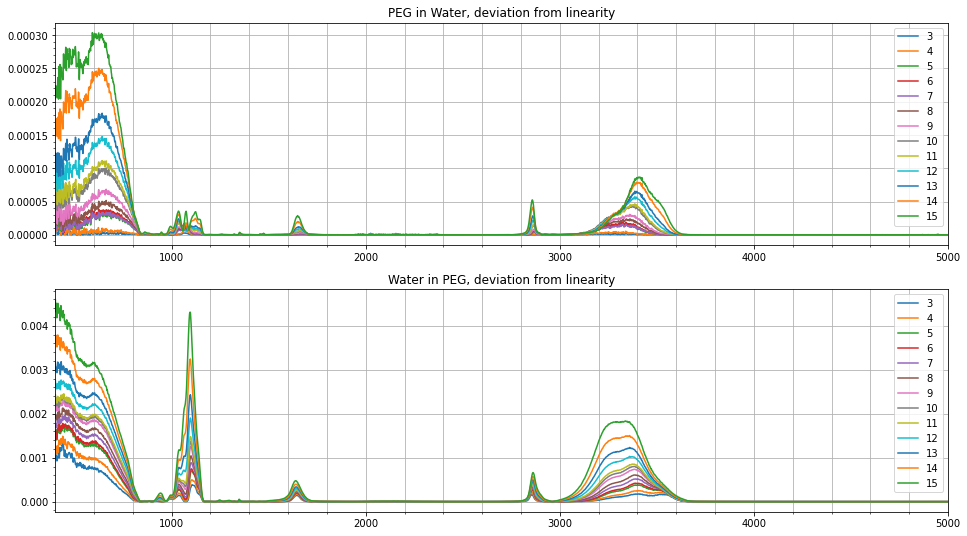

In [159]:
fig, axs = plt.subplots(2, 1)

fig.set_figheight(9)
fig.set_figwidth(16)

axs[0].set_title("PEG in Water, deviation from linearity")
axs[0].minorticks_on()
axs[0].xaxis.grid(True, which='both')
axs[0].yaxis.grid(True, which='major')
axs[0].set_xlim([400, 5000])

for i in range(R_left.shape[0]):
    axs[0].plot(Lambda, R_left[i], label=str(i+3))
axs[0].legend()


axs[1].set_title("Water in PEG, deviation from linearity")
axs[1].minorticks_on()
axs[1].xaxis.grid(True, which='both')
axs[1].yaxis.grid(True, which='major')
axs[1].set_xlim([400, 5000])

for i in range(R_right.shape[0]):
    axs[1].plot(Lambda, R_right[i], label=str(i+3))

axs[1].legend()

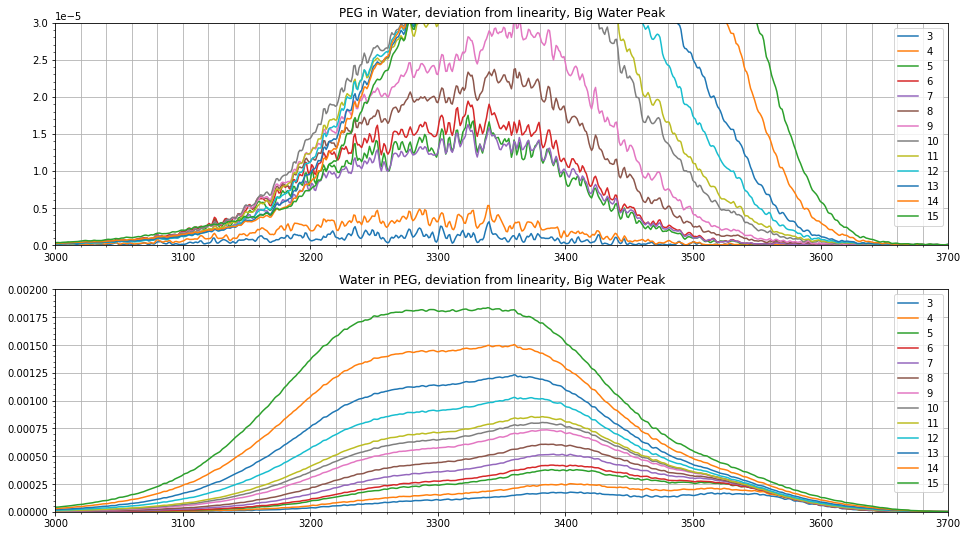

In [169]:
fig, axs = plt.subplots(2, 1)

fig.set_figheight(9)
fig.set_figwidth(16)

axs[0].set_title("PEG in Water, deviation from linearity, Big Water Peak")
axs[0].minorticks_on()
axs[0].xaxis.grid(True, which='both')
axs[0].yaxis.grid(True, which='major')
axs[0].set_xlim([3000, 3700])
axs[0].set_ylim([0, 0.00003])

for i in range(R_left.shape[0]):
    axs[0].plot(Lambda, R_left[i], label=str(i+3))
axs[0].legend()


axs[1].set_title("Water in PEG, deviation from linearity, Big Water Peak")
axs[1].minorticks_on()
axs[1].xaxis.grid(True, which='both')
axs[1].yaxis.grid(True, which='major')
axs[1].set_xlim([3000, 3700])
axs[1].set_ylim([0, 0.002])

for i in range(R_right.shape[0]):
    axs[1].plot(Lambda, R_right[i], label=str(i+3))

axs[1].legend()

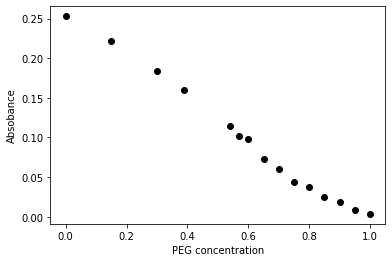

In [95]:
### Left Side of The Water Peak ###
plt.xlabel('PEG concentration')
plt.ylabel('Absobance')
i = int(index(3150))
plt.plot(n_PEG, PEG[:,i], 'ok')
#plt.plot(n_PEG, PEG_Pred[:,i], 'r')

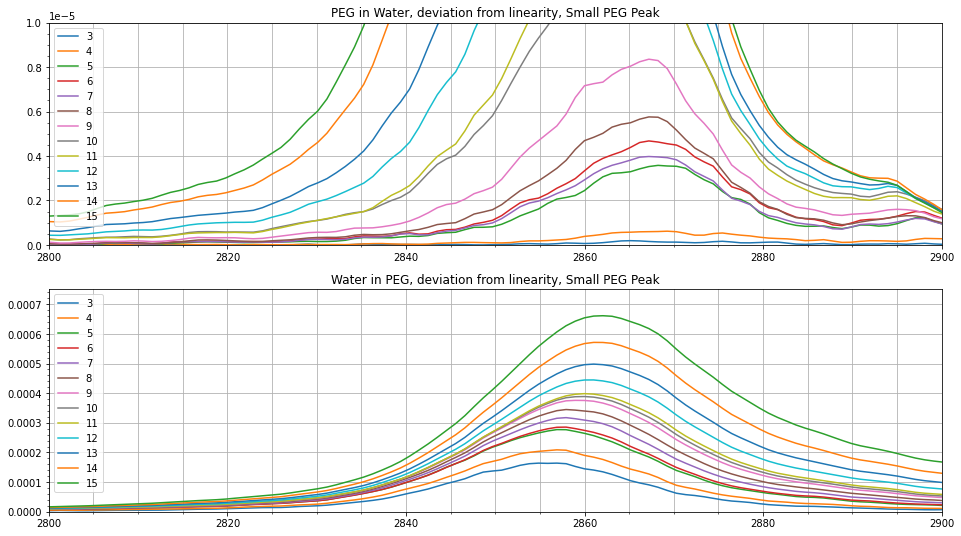

In [168]:
fig, axs = plt.subplots(2, 1)

fig.set_figheight(9)
fig.set_figwidth(16)

axs[0].set_title("PEG in Water, deviation from linearity, Small PEG Peak")
axs[0].minorticks_on()
axs[0].xaxis.grid(True, which='both')
axs[0].yaxis.grid(True, which='major')
axs[0].set_xlim([2800, 2900])
axs[0].set_ylim([0, 0.00001])

for i in range(R_left.shape[0]):
    axs[0].plot(Lambda, R_left[i], label=str(i+3))
axs[0].legend()


axs[1].set_title("Water in PEG, deviation from linearity, Small PEG Peak")
axs[1].minorticks_on()
axs[1].xaxis.grid(True, which='both')
axs[1].yaxis.grid(True, which='major')
axs[1].set_xlim([2800, 2900])
axs[1].set_ylim([0, 0.00075])

for i in range(R_right.shape[0]):
    axs[1].plot(Lambda, R_right[i], label=str(i+3))
axs[1].legend()

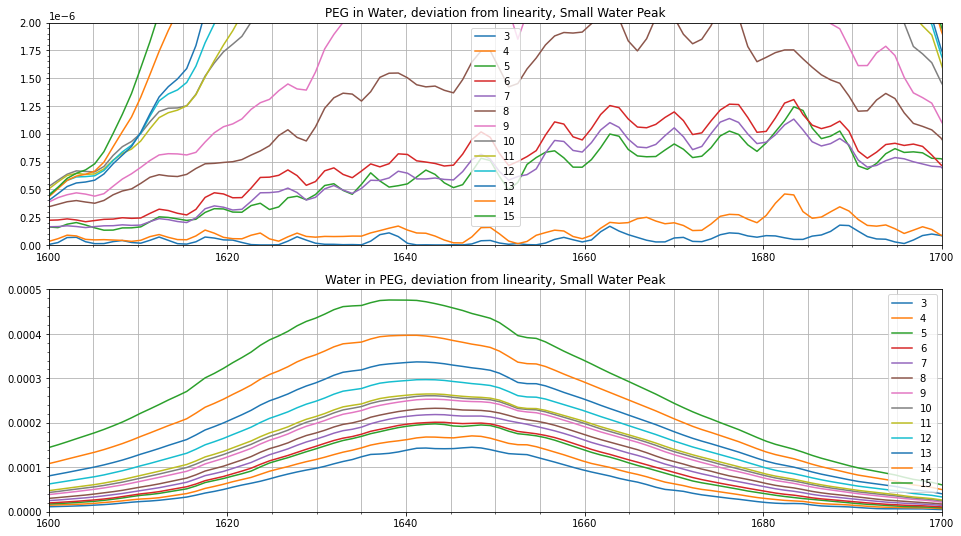

In [172]:
fig, axs = plt.subplots(2, 1)

fig.set_figheight(9)
fig.set_figwidth(16)

axs[0].set_title("PEG in Water, deviation from linearity, Small Water Peak")
axs[0].minorticks_on()
axs[0].xaxis.grid(True, which='both')
axs[0].yaxis.grid(True, which='major')
axs[0].set_xlim([1600, 1700])
axs[0].set_ylim([0, 0.000002])

for i in range(R_left.shape[0]):
    axs[0].plot(Lambda, R_left[i], label=str(i+3))
axs[0].legend()


axs[1].set_title("Water in PEG, deviation from linearity, Small Water Peak")
axs[1].minorticks_on()
axs[1].xaxis.grid(True, which='both')
axs[1].yaxis.grid(True, which='major')
axs[1].set_xlim([1600, 1700])
axs[1].set_ylim([0, 0.0005])

for i in range(R_right.shape[0]):
    axs[1].plot(Lambda, R_right[i], label=str(i+3))
axs[1].legend()

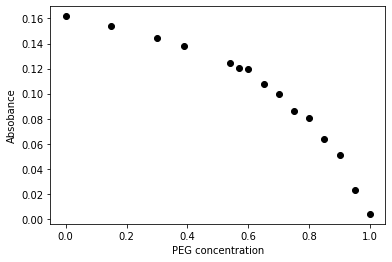

In [94]:
### The Small Water Peak ###
plt.xlabel('PEG concentration')
plt.ylabel('Absobance')
i = int(index(1650))
plt.plot(n_PEG, PEG[:,i], 'ok')
#plt.plot(n_PEG, PEG_Pred[:,i], 'r')

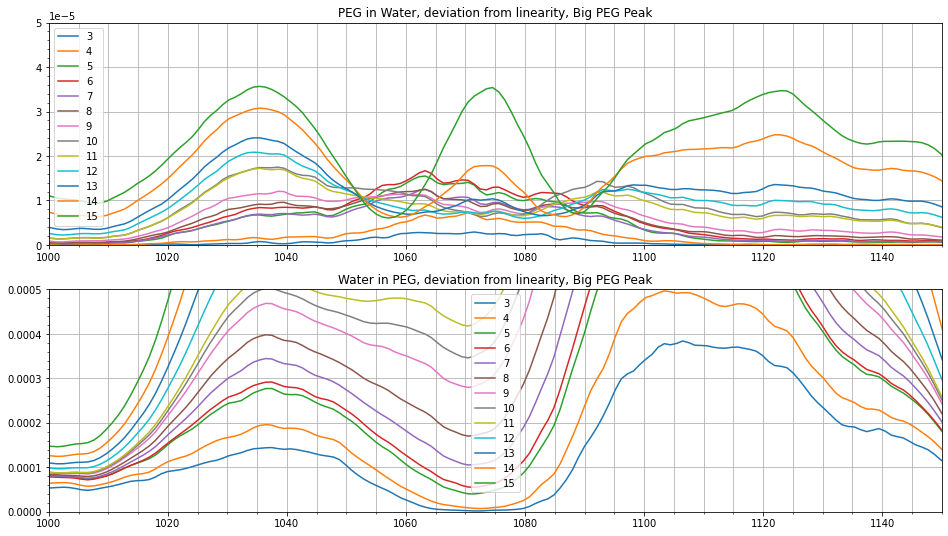

In [185]:
fig, axs = plt.subplots(2, 1)

fig.set_figheight(9)
fig.set_figwidth(16)

axs[0].set_title("PEG in Water, deviation from linearity, Big PEG Peak")
axs[0].minorticks_on()
axs[0].xaxis.grid(True, which='both')
axs[0].yaxis.grid(True, which='major')
axs[0].set_xlim([1000, 1150])
axs[0].set_ylim([0, 0.00005])

for i in range(R_right.shape[0]):
    axs[0].plot(Lambda, R_left[i], label=str(i+3))
axs[0].legend()


axs[1].set_title("Water in PEG, deviation from linearity, Big PEG Peak")
axs[1].minorticks_on()
axs[1].xaxis.grid(True, which='both')
axs[1].yaxis.grid(True, which='major')
axs[1].set_xlim([1000, 1150])
axs[1].set_ylim([0, 0.0005])

for i in range(R_right.shape[0]):
    axs[1].plot(Lambda, R_right[i], label=str(i+3))
axs[1].legend()

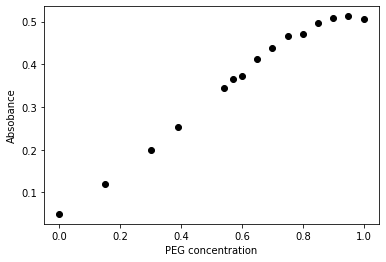

In [93]:
### The Big PEG Peak ###
plt.xlabel('PEG concentration')
plt.ylabel('Absobance')
i = int(index(1073))
plt.plot(n_PEG, PEG[:,i], 'ok')
#plt.plot(n_PEG, PEG_Pred[:,i], 'r')

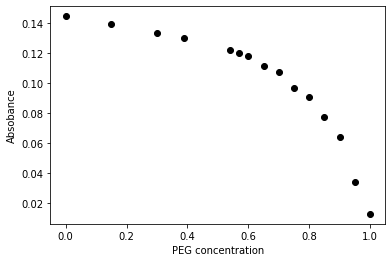

In [96]:
### Right Side of The Water Peak ###
plt.xlabel('PEG concentration')
plt.ylabel('Absobance')
i = int(index(3550))
plt.plot(n_PEG, PEG[:,i], 'ok')
#plt.plot(n_PEG, PEG_Pred[:,i], 'r')

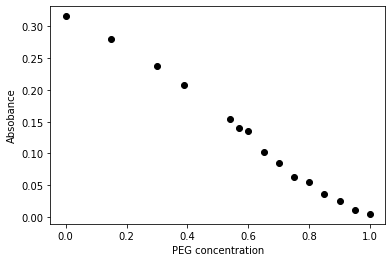

In [186]:
### The Water Peak ###
plt.xlabel('PEG concentration')
plt.ylabel('Absobance')
i = int(index(3190))
plt.plot(n_PEG, PEG[:,i], 'ok')
#plt.plot(n_PEG, PEG_Pred[:,i], 'r')

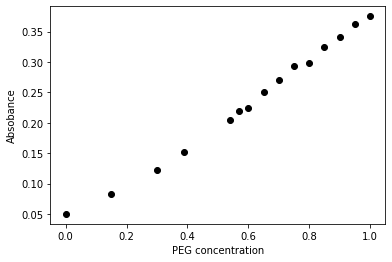

In [187]:
### Big PEG Peak Transition ###
plt.xlabel('PEG concentration')
plt.ylabel('Absobance')
i = int(index(1052))
plt.plot(n_PEG, PEG[:,i], 'ok')
#plt.plot(n_PEG, PEG_Pred[:,i], 'r')

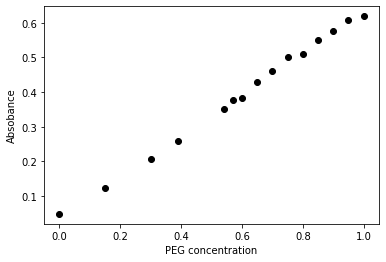

In [188]:
### Big PEG Peak Transition ###
plt.xlabel('PEG concentration')
plt.ylabel('Absobance')
i = int(index(1088))
plt.plot(n_PEG, PEG[:,i], 'ok')
#plt.plot(n_PEG, PEG_Pred[:,i], 'r')

# Three-component Solutions

The most logical extrapolation of our previous model for three_component solutions will be

$f_{sol} = c_0 f_0 + c_1 f_1 + c_2 f_2 + 4c_0 c_1 f_{01} + 4c_0 c_2 f_{02} + 4c_1 c_2 f_{12}$

But our initial goal is to check whether the separation occures because of the change in water, so we are going to neglect the last term:

$f_{sol} = c_0 f_0 + c_1 f_1 + c_2 f_2 + 4c_0 c_1 f_{01} + 4c_0 c_2 f_{02}$

##### Notation for Math
To simplify further calculations we an expres our formula as such:

$y = c_i x_i + c_i c_j X_{i j}$*

where $i$ and $j$ are either $1$ or $2$,

$y := f - f_0$

$x_i := f_i + 4f_{i 0} - f_0$

$X_{i j} := - 2 (f_{i 0} + f_{j 0})$

\* there is summation by repeating indeses

###### Probability Thery

We can find, that expected valu of $y$ is

$E (y) = x_i c_i + x_{ij}[c_i c_j + Cov(c_i, c_j)]$

And its variance is

$Var(y) = c_i c_j Cov(x_i, x_j) + 2 c_i c_j c_k Cov(x_{ij}, x_k) + c_i c_j c_k c_l Cov(x_{ij}, x_{kl}) +$

$+ (x_i + 2 c_k x_{ik})(x_j + 2 c_l x_{jl}) Cov(c_i, c_j) - 2 (c_k x_k + c_k c_l x_{kl}) x_{ij} Cov(c_i, c_j)$

Here

$c_i c_j c_k c_l Cov(x_{ij}, x_{kl}) = \alpha_i c^2_i (c_0 + c_1)^2 \qquad \alpha_i = 16 Var(Inter_i)$

$c_i c_j c_k Cov(x_{ij}, x_k) = \beta_i c^2_i (c_0 + c_1) \qquad \beta_i = 16 Var(Inter_i) - 4 Cov(Inter_i, Pred_i)$

$c_i c_j Cov(x_i, x_j) = \gamma_i c^2_i \qquad \gamma_i = 16 Var(Inter_i) - 8 Cov(Inter_i, Pred_i) + Var(Pred_i)$

In [ ]:
def predict(c, cov_c=0, err=True):
    """
    c: vector of concentrations, first TMAO, second PEG
    cov_c: covariance matrix of c
    err: whether to retirn errors
    
    returns: predicted spectrum or tulip with predicted spectrum and its error if err is True
    """
    Pure = np.array([TMAO_Pure, PEG_Pureure])
    Inter = np.array([Inter_TMAO, Inter_PEG])
    
    c = np.asarray(c)
    x = Pure + 4*Inter - NaPB[None, :]
    X = - (Inter[None, :, :] + Inter[:, None, :]) * 2
    
    cx = (c[:, None] * x).sum(axis=0)
    cX = (c[:, None, None] * X ).sum(axis=0)
    ccX = (c[:, None] * cX).sum(axis=0)
    
    pred = NaPB + cx + ccX
    if type(cov_c) != int:
        pred += (cov_c[..., None] * X).sum(axis=(0, 1))
        
    if err == True:
        N = Lambda.shape[0]
        cov_spectra = np.array([Cov_TMAO.swapaxes(0,2),
                                [[d_Inter_PEG**2, np.zeros(N)],
                                 [np.zeros(N),    np.zeros(N)]]])
    
        d_XX = 16 * cov_spectra[:,0,0]
        d_XX = (d_XX * (c**2)[:,None]).sum(axis=0)
        d_XX *= (c.sum()**2)

        d_Xx = 16 * cov_spectra[:,0,0]
        d_Xx += 4 * cov_spectra[:,0,1]
        d_Xx = (d_Xx * (c**2)[:,None]).sum(axis=0)
        d_Xx = -d_Xx * 2 * (c.sum())
    

        d_xx = 16 * cov_spectra[:,0,0]
        d_xx += 8 * cov_spectra[:,0,1]
        d_xx += cov_spectra[:,1,1]
        d_xx = (d_xx * (c**2)[:,None]).sum(axis=0)
    
        if type(cov_c) != int:
            d_pred = (x + 2*cX)[:, None] * (x + 2*cX)[None, :]
            d_pred -= 2*(cx + ccX) * X
            d_pred = (d_pred * cov_c[..., None]).sum(axis=(0,1))
        else:
            d_pred = 0
        d_pred += d_XX
        d_pred += d_Xx
        d_pred += d_xx
        d_pred = d_pred**.5
    
        return pred, d_pred
    else:
        return pred

## Below Binodal

In [ ]:
Pred_Below = []
d_Pred_Below = []
for i in range(n_Below.shape[1]):
    p, d_p = predict(n_Below[1:3, i])
    Pred_Below.append(p)
    d_Pred_Below.append(d_p)
    
Pred_Below = np.array(Pred_Below)
d_Pred_Below = np.array(d_Pred_Below)

### Graphs

In [ ]:
def plot_below_binodal(i):
    plt_spectrum_header()
    graph_title = 'TMAO ' + str(int(n_Below[1, i]*100)) + '%, '
    graph_title += 'PEG ' + str(int(n_Below[2, i]*100)) + '%'
    plt.title(graph_title)


    plt.plot(Lambda, Below[i], 'tab:blue', label='Experiment')

    plt.plot(Lambda, Pred_Below[i], 'tab:orange', label='Predicted')
    plt.plot(Lambda, Pred_Below[i]+d_Pred_Below[i], 'tab:orange')
    plt.plot(Lambda, Pred_Below[i]-d_Pred_Below[i], 'tab:orange')

    plt.plot(Lambda, Below[i]-Pred_Below[i], 'tab:red', label='Difference')
    plt.plot(Lambda, Below[i]-Pred_Below[i]+d_Pred_Below[i], 'tab:red')
    plt.plot(Lambda, Below[i]-Pred_Below[i]-d_Pred_Below[i], 'tab:red')


    plt.legend()
    plt.savefig(Graph_folder + graph_title)

In [ ]:
plot_below_binodal(0)

In [ ]:
plot_below_binodal(1)

In [ ]:
plot_below_binodal(2)

## Above Binodal

Here our task is to finde the concentrations. The model is as usual

$f = c_0 f_0 + c_1 f_1 + c_2 f_2 + 4c_0 c_1 f_{01} + 4c_0 c_2 f_{02}$

We can't do it analyticly, so we'll do it numerically. Here we are going to use the notation above

$y = c_i x_i + c_i c_j X_{i j}$*

where $i$ and $j$ are either $1$ or $2$,

$y := f - f_0$

$x_i := f_i + 4f_{i 0} - f_0$

$X_{i j} := - 2 (f_{i 0} + f_{j 0})$

\* there is summation by repeating indeses

In [ ]:
from scipy.optimize import curve_fit

Pure = np.array([TMAO_Pure, PEG_Pureure])
Inter = np.array([Inter_TMAO, Inter_PEG])

y = Above - NaPB[None, :]
x = Pure + 4*Inter - NaPB[None, :]
X = - (Inter[None, :, :] + Inter[:, None, :]) * 2

y_data = y
x_data = np.append(X, x[:, None, :], axis=1)

bounds = (0, 1)
c0 = [.18, .54]

def model(x_data, c1, c2):
    c = np.array([c1, c2])
    x = x_data[:, 2, :].squeeze()
    X = x_data[:, 0:2, :]
    
    y = (X * c[:, None, None]).sum(axis=0)
    y = (y * c[:, None]).sum(axis=0)
    y += (x * c[:, None]).sum(axis=0)
    return y

def jac(x_data, c1, c2):
    c = np.array([c1, c2])
    x = x_data[:, 2, :].squeeze()
    X = x_data[:, 0:2, :] 
    
    j = x + 2*(X * c[:, None, None]).sum(axis=0)
    return j.T

In [ ]:
C = []
Cov_C = []
for i in range(y_data.shape[0]):
    c, Cov_c = curve_fit(model, x_data, y_data[i],  bounds = bounds, jac=jac)
    C.append(c)
    Cov_C.append(Cov_c)
    
C = np.array(C)
Cov_C = np.array(Cov_C)

In [ ]:
Pred_Above = []
d_Pred_Above = []
for i in range(C.shape[0]):
    p, d_p = predict(C[i], Cov_C[i])
    Pred_Above.append(p)
    d_Pred_Above.append(d_p)
    
Pred_Above = np.array(Pred_Above)
d_Pred_Above = np.array(d_Pred_Above)

### Graphs

In [ ]:
def plot_above_binodal(i):
    if i < Above.shape[0]/2:
        up_down = 'down'
    else:
        up_down = 'up'
    graph_title = 'TMAO ' + str(int(n_Above[1, i]*100)) + '%, '
    graph_title += 'PEG ' + str(int(n_Above[2, i]*100)) + '%, '
    graph_title += up_down
    subtitle = ' (TMAO '+ str(int(C[i, 0]*1000)/10) + '%, '
    subtitle += 'PEG ' + str(int(C[i, 1]*1000)/10) + '%, '
    subtitle += 'H2O ' + str(int((1 - C[i, 0] - C[i, 1])*1000)/10) + '%)'
    
    plt_spectrum_header()
    plt.title(graph_title + subtitle)
    
    
    plt.plot(Lambda, Pred_Above[i], 'tab:orange', label='Predicted')

    plt.plot(Lambda, Pred_Above[i]+d_Pred_Above[i], 'tab:orange')
    plt.plot(Lambda, Pred_Above[i]-d_Pred_Above[i], 'tab:orange')
    plt.plot(Lambda, Above[i], 'tab:blue', label='Experiment')

    plt.plot(Lambda, Above[i]-Pred_Above[i]+d_Pred_Above[i], 'tab:red')
    plt.plot(Lambda, Above[i]-Pred_Above[i]-d_Pred_Above[i], 'tab:red')
    plt.plot(Lambda, Above[i]-Pred_Above[i], 'tab:red', label='Difference')

    plt.legend()
    plt.savefig(Graph_folder + graph_title)

In [ ]:
plot_above_binodal(0)

In [ ]:
plot_above_binodal(1)

In [ ]:
plot_above_binodal(2)

In [ ]:
plot_above_binodal(3)

In [ ]:
plot_above_binodal(4)

In [ ]:
plot_above_binodal(5)

# Comparison

In [ ]:
plt_spectrum_header()
plt.title('PEG 54%, Comparison')

plt.plot(Lambda, PEG[4], label='exp')
plt.plot(Lambda, .46 * NaPB + PEG_Pureure * .54, label='linear')
plt.plot(Lambda, predict([0, .54])[0], label='quadratic')

plt.legend()
plt.savefig(Graph_folder + 'PEG 54%, comparison')

In [ ]:
plt_spectrum_header()
plt.title('TMAO 50%, Comparison')

plt.plot(Lambda, TMAO[-2], label='exp')
plt.plot(Lambda, .5 * NaPB + TMAO_Dry * .5, label='linear, with dry')
plt.plot(Lambda, .5 * NaPB + TMAO_Pure * .5, label='linear, with wet')
plt.plot(Lambda, predict([.5, 0])[0], label='quadratic')

plt.legend()
plt.savefig(Graph_folder + 'TMAO 50%, comparison')

Диаграмы ленгмюр (изотерма сорбции)

Диаграмы скечерт (стехиометрия и константа взоимодействия)

Диаграмы хилл (кооперативность)

fedichev (ML in bio) ageing busnessman in MIPT